## Cancer Classification models

**Classifier 1:**

In [1]:
TP = 50
TN = 200
FP = 750
FN = 0

In [2]:
# First classifier
accuracy_c1 = (TP+TN) / (TP+TN+FP+FN)
accuracy_c1

0.25

In [3]:
precision_c1 = TP / (TP+FP)
precision_c1

0.0625

In [4]:
recall_c1 = TP / (TP+FN)
recall_c1

1.0

In [5]:
f1_c1 = 2*precision_c1*recall_c1/(precision_c1+recall_c1)
round (f1_c1, 2)

0.12

**Classifier 2:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-nrix{text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0lax"></th>
    <th class="tg-nrix" colspan="2">Actual</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-cly1">No Cancer</td>
    <td class="tg-cly1">Cancer</td>
  </tr>
  <tr>
    <td class="tg-cly1" rowspan="2">Prediction</td>
    <td class="tg-cly1">No Cancer</td>
    <td class="tg-cly1">890</td>
    <td class="tg-cly1">10</td>
  </tr>
  <tr>
    <td class="tg-cly1">Cancer</td>
    <td class="tg-cly1">60</td>
    <td class="tg-cly1">40</td>
  </tr>
</tbody>
</table>

In [6]:
TP_cl2 = 40
TN_cl2 = 890
FP_cl2 = 60
FN_cl2 = 10

In [7]:
# Second classifier
accuracy_c2 = (TP_cl2+TN_cl2) / (TP_cl2+TN_cl2+FP_cl2+FN_cl2)
accuracy_c2

0.93

In [8]:
precision_c2 = TP_cl2 / (TP_cl2+FP_cl2)
precision_c2

0.4

In [9]:
recall_c2 = TP_cl2 / (TP_cl2+FN_cl2)
recall_c2

0.8

In [10]:
f1_c2 = 2*precision_c2*recall_c2/(precision_c2+recall_c2)
f1_c2

0.5333333333333333

# Evaluating Classifiers

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Set the figure size for matplotlib plots to (12,6) inches
plt.rcParams['figure.figsize'] = (12,6)

#### Read the data

In [12]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [13]:
# Kick out the Chinstraps and null values
df_binary = df[df['species']!='Chinstrap'].dropna()
df_binary.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


#### Split the data into X and y

In [14]:
y = df_binary['species']
X = df_binary[['bill_length_mm']]

#### Split the data into train and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X_train.shape, X_test.shape

((198, 1), (67, 1))

**Exploratory Data Analysis**

#### Feature Engineering

In the afternoon

#### Build a simple logistic regression

In [17]:
m = LogisticRegression()

In [18]:
m.fit(X_train, y_train)

LogisticRegression()

## 1) Accuracy

The first and easiest way to evaluate a classifier is the **accuracy**. It measures which ratio of the observations you classified correctly.

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# Make predictions for the training dataset
y_pred_train = m.predict(X_train)

In [21]:
print(f'The accuracy of our model is {round(accuracy_score(y_true=y_train, y_pred=y_pred_train), 2)}')

The accuracy of our model is 0.94


Is accuracy always a good metric to evaluate your classification?<br>

Depending on the cost of misclassification we might be more interested in making sure that we do not have False Negatives or False Positives, depending on the problem at hand.

## 2) Types of Errors and the Confusion Matrix

**False Positive:**<br>
An observation is classified as positive, although it actually is negative.

**False Negatives:**<br>
An observation is classified as negative, although it actually is positive.

You can plot the different types of errors in a **confusion matrix**.

In [22]:
m.score(X_train, y_train) # accuracy is default

0.9393939393939394

In [23]:
from sklearn.metrics import plot_confusion_matrix

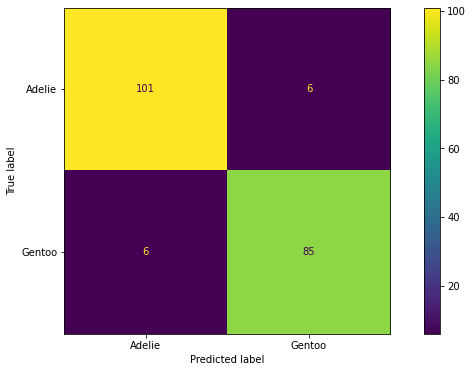

In [24]:
plot_confusion_matrix(estimator=m,
                     X=X_train,
                     y_true=y_train)
plt.show()

## 3) Precision

$precision = \frac{TP}{TP + FP}$

In [25]:
from sklearn.metrics import precision_score

In [26]:
round(precision_score(y_train, y_pred_train, pos_label='Gentoo'), 2)

0.93

## 4) Recall

$recall = \frac{TP}{TP + FN}$

In [27]:
from sklearn.metrics import recall_score

In [28]:
round(recall_score(y_train, y_pred_train, pos_label='Gentoo'), 2)

0.93

## 5) F1-Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [29]:
from sklearn.metrics import f1_score

In [30]:
round(f1_score(y_train, y_pred_train, pos_label='Gentoo'), 2)

0.93